In [48]:
import numpy as np

# Example Notebook

## Games

In [61]:
# Import packages
from IPython.display import display
import pandas as pd
from games import (
    get_games,
    get_games_team_box,
    get_player_stats,
    get_game_weather,
    get_team_records,
)

In [62]:
from credentials import API_KEY

print(f"API Key Loaded: {API_KEY}")  # Masking for security

API Key Loaded: RzqGv01BF2DI+10cDfII/J8JNpKLxMj9uOKi5S40/FZHnUGys8C85KHPqFpQcE7+


In [116]:
# import pandas as pd
# from ratings import get_sp_ratings, get_sp_conference_ratings, get_fpi_ratings, get_elo_ratings
# from recruiting import get_recruiting_players, get_recruiting_teams

# # Retrieve game data for 2024 Season
# games_data_2024 = get_games(
#     year=2024,
#     session_type='regular',
#     classification='fbs'
# )
# print("\nGames Data (2024):")
# display(pd.DataFrame(games_data_2024).head())

# # Retrieve team box score stats for 2024
# #######
# # top_team_stats_2024 = get_games_team_box(
# #     year=2024,
# #     week =1
# # )
# # print("\nTeam Box Scores (2024):")
# #display(top_team_stats_2024)

# # Retrieve player stats for 2024 season
# player_stats_2024 = get_player_stats(
#     year=2024,
#     season_type='regular'
# )
# print("\nPlayer Stats (2024):")
# display(pd.DataFrame(player_stats_2024).head())

# # Get recruiting rankings for 2024
# players_2024 = get_recruiting_players(year=2024)
# print("\nRecruiting Player Rankings (2024):")
# display(players_2024)

# teams_2024 = get_recruiting_teams(year=2024)
# print("\nTeam Recruiting Rankings (2024):")
# display(teams_2024)

# # Get SP+ ratings for 2024
# sp_ratings_2024 = get_sp_ratings(year=2024, team=None)
# print("\nSP+ Ratings (2024):")
# display(sp_ratings_2024)

# # Get conference SP+ ratings for 2024
# conf_ratings_2024 = get_sp_conference_ratings(year=2024)
# print("\nConference SP+ Ratings (2024):")
# display(conf_ratings_2024)

# # Get FPI ratings for USC in 2024
# usc_fpi_2024 = get_fpi_ratings(year=2024, team="USC")
# print("\nFPI Ratings for USC (2024):")
# display(usc_fpi_2024)

# # Get Elo ratings for Week 1 of 2024
# week1_elo_2024 = get_elo_ratings(year=2024, week=1)
# print("\nElo Ratings (Week 1, 2024):")
# display(week1_elo_2024)

# Get box scores

In [117]:
import pandas as pd

# Collect data for multiple weeks
all_weeks_data = []
for week in range(1, 7):  # Weeks 1-6
    week_data = get_games_team_box(year=2024, week=week, classification="fbs")
    all_weeks_data.extend(week_data)

df_team_stats = pd.DataFrame(all_weeks_data)

# Display column names
print("\nTeam Box Scores Columns (2024):")
print(df_team_stats.columns.tolist())
df_team_stats


Team Box Scores Columns (2024):
['id', 'teams']


,id,teams
0,401628456,"[{'teamId': 2483, 'team': 'Oregon', 'conferenc..."
1,401677179,"[{'teamId': 84, 'team': 'Indiana', 'conference..."
2,401677189,"[{'teamId': 213, 'team': 'Penn State', 'confer..."
3,401677192,"[{'teamId': 194, 'team': 'Ohio State', 'confer..."
4,401677184,"[{'teamId': 61, 'team': 'Georgia', 'conference..."
...,...,...
450,401628381,"[{'teamId': 61, 'team': 'Georgia', 'conference..."
451,401628379,"[{'teamId': 2633, 'team': 'Tennessee', 'confer..."
452,401628383,"[{'teamId': 245, 'team': 'Texas A&M', 'confere..."
453,401628382,"[{'teamId': 2579, 'team': 'South Carolina', 'c..."


In [65]:
### Expand data

In [66]:
# Expand the 'teams' column into separate rows
expanded_data = []
for game in df_team_stats.itertuples():
    game_id = game.id
    for team in game.teams:
        team_entry = {
            "game_id": game_id,
            "teamId": team["teamId"],
            "team": team["team"],
            "conference": team.get("conference", None),
            "homeAway": team["homeAway"],
            "points": team["points"],
        }

        # Extract statistics from the 'stats' field
        for stat in team["stats"]:
            team_entry[stat["category"]] = stat["stat"]

        expanded_data.append(team_entry)

df_final = pd.DataFrame(expanded_data)

print("\nFully Expanded Team Box Scores Columns (2024):")
print(df_final.columns.tolist())

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Now display the DataFrame
display(df_final.head())
display(df_final.shape)


Fully Expanded Team Box Scores Columns (2024):
['game_id', 'teamId', 'team', 'conference', 'homeAway', 'points', 'firstDowns', 'thirdDownEff', 'fourthDownEff', 'totalYards', 'netPassingYards', 'completionAttempts', 'yardsPerPass', 'rushingYards', 'rushingAttempts', 'yardsPerRushAttempt', 'totalPenaltiesYards', 'turnovers', 'fumblesLost', 'interceptions', 'possessionTime', 'passesDeflected', 'qbHurries', 'sacks', 'tackles', 'defensiveTDs', 'tacklesForLoss', 'totalFumbles', 'fumblesRecovered', 'passesIntercepted', 'interceptionTDs', 'interceptionYards', 'kickingPoints', 'passingTDs', 'puntReturns', 'puntReturnTDs', 'puntReturnYards', 'rushingTDs', 'kickReturns', 'kickReturnTDs', 'kickReturnYards']


,game_id,teamId,team,conference,homeAway,points,firstDowns,thirdDownEff,fourthDownEff,totalYards,netPassingYards,completionAttempts,yardsPerPass,rushingYards,rushingAttempts,yardsPerRushAttempt,totalPenaltiesYards,turnovers,fumblesLost,interceptions,possessionTime,passesDeflected,qbHurries,sacks,tackles,defensiveTDs,tacklesForLoss,totalFumbles,fumblesRecovered,passesIntercepted,interceptionTDs,interceptionYards,kickingPoints,passingTDs,puntReturns,puntReturnTDs,puntReturnYards,rushingTDs,kickReturns,kickReturnTDs,kickReturnYards
0,401628456,2483,Oregon,Big Ten,home,24,31,7-16,1-3,487,380,41-50,7.6,107,37,2.9,8-60,1,1,0,39:15,1,2,4,14,0,7,1,0,2,0,0,6,2,3,0,-9,1,NaN,NaN,NaN
1,401628456,70,Idaho,Big Sky,away,14,10,2-12,0-1,217,168,11-27,6.2,49,20,2.5,3-15,2,0,2,20:45,3,0,3,48,0,6,2,1,NaN,NaN,NaN,2,1,NaN,NaN,NaN,1,NaN,NaN,NaN
2,401677179,84,Indiana,Big Ten,away,17,17,4-12,1-1,278,215,20-34,6.3,63,27,2.3,5-46,1,0,1,24:20,3,1,2,32,0,10,1,0,1,0,3,3,2,NaN,NaN,NaN,0,1,0,18
3,401677179,87,Notre Dame,FBS Independents,home,27,20,7-13,0-0,394,201,23-32,6.3,193,35,5.5,6-35,1,0,1,35:40,3,2,3,35,0,10,1,0,1,0,0,9,1,1,0,9,2,3,0,65
4,401677189,213,Penn State,Big Ten,home,24,20,3-11,2-2,339,135,12-23,5.9,204,42,4.9,5-44,1,0,1,30:04,4,3,5,40,0,8,1,0,2,0,0,6,0,1,0,0,3,1,0,21


(910, 41)

## Get games example

In [67]:
## Data cleaning

In [68]:
### Duplicates - none

In [69]:
# Count duplicate rows
duplicate_count = df_final.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    display(df_final[df_final.duplicated()])


Number of duplicate rows: 0


In [70]:
### Missing values

In [71]:
# Count missing values per column
missing_counts = df_final.isnull().sum()
missing_percent = (missing_counts / len(df_final)) * 100

missing_data = missing_counts[missing_counts > 0]
print("\nMissing Values Count:")
print(missing_data)

print("\nMissing Data Percentage:")
print(missing_percent[missing_percent > 0])


Missing Values Count:
passesDeflected        8
qbHurries              8
sacks                  8
tackles                8
defensiveTDs           8
tacklesForLoss         8
totalFumbles         208
passesIntercepted    407
interceptionTDs      407
interceptionYards    407
kickingPoints         19
puntReturns          300
puntReturnTDs        300
puntReturnYards      300
kickReturns          204
kickReturnTDs        204
kickReturnYards      204
dtype: int64

Missing Data Percentage:
passesDeflected       0.879121
qbHurries             0.879121
sacks                 0.879121
tackles               0.879121
defensiveTDs          0.879121
tacklesForLoss        0.879121
totalFumbles         22.857143
passesIntercepted    44.725275
interceptionTDs      44.725275
interceptionYards    44.725275
kickingPoints         2.087912
puntReturns          32.967033
puntReturnTDs        32.967033
puntReturnYards      32.967033
kickReturns          22.417582
kickReturnTDs        22.417582
kickReturnYards  

In [72]:
# remove missing data cols **defensive stats few missing values are excluded for now for model simplicity
import pandas as pd

# Identify columns with missing values
missing_cols = df_final.columns[df_final.isnull().sum() > 0]
print(f"\nDropping columns with missing values: {list(missing_cols)}")

df_final.drop(columns=missing_cols, inplace=True)

# Verify that no missing values remain
print("\nMissing Values After Dropping Columns:")
print(df_final.isnull().sum().sum())

print(f"\nNew Dataset Shape: {df_final.shape}")

display(df_final.head())


Dropping columns with missing values: ['passesDeflected', 'qbHurries', 'sacks', 'tackles', 'defensiveTDs', 'tacklesForLoss', 'totalFumbles', 'passesIntercepted', 'interceptionTDs', 'interceptionYards', 'kickingPoints', 'puntReturns', 'puntReturnTDs', 'puntReturnYards', 'kickReturns', 'kickReturnTDs', 'kickReturnYards']

Missing Values After Dropping Columns:
0

New Dataset Shape: (910, 24)


,game_id,teamId,team,conference,homeAway,points,firstDowns,thirdDownEff,fourthDownEff,totalYards,netPassingYards,completionAttempts,yardsPerPass,rushingYards,rushingAttempts,yardsPerRushAttempt,totalPenaltiesYards,turnovers,fumblesLost,interceptions,possessionTime,fumblesRecovered,passingTDs,rushingTDs
0,401628456,2483,Oregon,Big Ten,home,24,31,7-16,1-3,487,380,41-50,7.6,107,37,2.9,8-60,1,1,0,39:15,0,2,1
1,401628456,70,Idaho,Big Sky,away,14,10,2-12,0-1,217,168,11-27,6.2,49,20,2.5,3-15,2,0,2,20:45,1,1,1
2,401677179,84,Indiana,Big Ten,away,17,17,4-12,1-1,278,215,20-34,6.3,63,27,2.3,5-46,1,0,1,24:20,0,2,0
3,401677179,87,Notre Dame,FBS Independents,home,27,20,7-13,0-0,394,201,23-32,6.3,193,35,5.5,6-35,1,0,1,35:40,0,1,2
4,401677189,213,Penn State,Big Ten,home,24,20,3-11,2-2,339,135,12-23,5.9,204,42,4.9,5-44,1,0,1,30:04,0,0,3


In [73]:
### Check Data type

In [74]:
print("\nData Types:")
print(df_final.dtypes)


Data Types:
game_id                 int64
teamId                  int64
team                   object
conference             object
homeAway               object
points                  int64
firstDowns             object
thirdDownEff           object
fourthDownEff          object
totalYards             object
netPassingYards        object
completionAttempts     object
yardsPerPass           object
rushingYards           object
rushingAttempts        object
yardsPerRushAttempt    object
totalPenaltiesYards    object
turnovers              object
fumblesLost            object
interceptions          object
possessionTime         object
fumblesRecovered       object
passingTDs             object
rushingTDs             object
dtype: object


In [75]:
# Convert "X-Y" format to percentage
def convert_to_percentage(column):
    return (
        df_final[column]
        .str.split("-")
        .apply(
            lambda x: (int(x[0]) / int(x[1]) * 100)
            if len(x) == 2 and int(x[1]) > 0
            else 0
        )
    )


df_final["thirdDownConvRate"] = convert_to_percentage("thirdDownEff")
df_final["fourthDownConvRate"] = convert_to_percentage("fourthDownEff")
df_final["completionRate"] = convert_to_percentage("completionAttempts")

# Drop old columns
df_final.drop(
    columns=["thirdDownEff", "fourthDownEff", "completionAttempts"], inplace=True
)

In [76]:
df_final["penalties"] = (
    df_final["totalPenaltiesYards"].str.split("-").str[0].astype(int)
)
df_final["penaltyYards"] = (
    df_final["totalPenaltiesYards"].str.split("-").str[1].astype(int)
)

# Drop old column
df_final.drop(columns=["totalPenaltiesYards"], inplace=True)

In [77]:
df_final["possessionTimeSec"] = (
    df_final["possessionTime"]
    .str.split(":")
    .apply(
        lambda x: int(x[0]) * 60 + int(x[1])
        if isinstance(x, list) and len(x) == 2
        else 0
    )
)

# Drop old column
df_final.drop(columns=["possessionTime"], inplace=True)

In [78]:
# Convert numeric columns that were stored as objects
numeric_columns = [
    "points",
    "firstDowns",
    "totalYards",
    "netPassingYards",
    "yardsPerPass",
    "rushingYards",
    "rushingAttempts",
    "yardsPerRushAttempt",
    "turnovers",
    "fumblesLost",
    "interceptions",
    "fumblesRecovered",
    "passingTDs",
    "rushingTDs",
    "thirdDownConvRate",
    "fourthDownConvRate",
    "completionRate",
    "penalties",
    "penaltyYards",
    "possessionTimeSec",
]

df_final[numeric_columns] = df_final[numeric_columns].apply(pd.to_numeric)

In [79]:
# Check if all data types are correct
print(df_final.dtypes)

display(df_final.head())

game_id                  int64
teamId                   int64
team                    object
conference              object
homeAway                object
points                   int64
firstDowns               int64
totalYards               int64
netPassingYards          int64
yardsPerPass           float64
rushingYards             int64
rushingAttempts          int64
yardsPerRushAttempt    float64
turnovers                int64
fumblesLost              int64
interceptions            int64
fumblesRecovered         int64
passingTDs               int64
rushingTDs               int64
thirdDownConvRate      float64
fourthDownConvRate     float64
completionRate         float64
penalties                int64
penaltyYards             int64
possessionTimeSec        int64
dtype: object


,game_id,teamId,team,conference,homeAway,points,firstDowns,totalYards,netPassingYards,yardsPerPass,rushingYards,rushingAttempts,yardsPerRushAttempt,turnovers,fumblesLost,interceptions,fumblesRecovered,passingTDs,rushingTDs,thirdDownConvRate,fourthDownConvRate,completionRate,penalties,penaltyYards,possessionTimeSec
0,401628456,2483,Oregon,Big Ten,home,24,31,487,380,7.6,107,37,2.9,1,1,0,0,2,1,43.750000,33.333333,82.000000,8,60,2355
1,401628456,70,Idaho,Big Sky,away,14,10,217,168,6.2,49,20,2.5,2,0,2,1,1,1,16.666667,0.000000,40.740741,3,15,1245
2,401677179,84,Indiana,Big Ten,away,17,17,278,215,6.3,63,27,2.3,1,0,1,0,2,0,33.333333,100.000000,58.823529,5,46,1460
3,401677179,87,Notre Dame,FBS Independents,home,27,20,394,201,6.3,193,35,5.5,1,0,1,0,1,2,53.846154,0.000000,71.875000,6,35,2140
4,401677189,213,Penn State,Big Ten,home,24,20,339,135,5.9,204,42,4.9,1,0,1,0,0,3,27.272727,100.000000,52.173913,5,44,1804


In [80]:
# Create 'win' column: 1 if the team won, 0 if lost
df_final["win"] = df_final.groupby("game_id")["points"].transform(
    lambda x: (x == x.max()).astype(int)
)

# Drop 'points' since it's the outcome, and we don't want data leakage
df_final.drop(columns=["points"], inplace=True)

# Verify changes
display(df_final.head())
df_final.columns

,game_id,teamId,team,conference,homeAway,firstDowns,totalYards,netPassingYards,yardsPerPass,rushingYards,rushingAttempts,yardsPerRushAttempt,turnovers,fumblesLost,interceptions,fumblesRecovered,passingTDs,rushingTDs,thirdDownConvRate,fourthDownConvRate,completionRate,penalties,penaltyYards,possessionTimeSec,win
0,401628456,2483,Oregon,Big Ten,home,31,487,380,7.6,107,37,2.9,1,1,0,0,2,1,43.750000,33.333333,82.000000,8,60,2355,1
1,401628456,70,Idaho,Big Sky,away,10,217,168,6.2,49,20,2.5,2,0,2,1,1,1,16.666667,0.000000,40.740741,3,15,1245,0
2,401677179,84,Indiana,Big Ten,away,17,278,215,6.3,63,27,2.3,1,0,1,0,2,0,33.333333,100.000000,58.823529,5,46,1460,0
3,401677179,87,Notre Dame,FBS Independents,home,20,394,201,6.3,193,35,5.5,1,0,1,0,1,2,53.846154,0.000000,71.875000,6,35,2140,1
4,401677189,213,Penn State,Big Ten,home,20,339,135,5.9,204,42,4.9,1,0,1,0,0,3,27.272727,100.000000,52.173913,5,44,1804,0


Index(['game_id', 'teamId', 'team', 'conference', 'homeAway', 'firstDowns', 'totalYards', 'netPassingYards', 'yardsPerPass', 'rushingYards', 'rushingAttempts', 'yardsPerRushAttempt', 'turnovers', 'fumblesLost', 'interceptions', 'fumblesRecovered', 'passingTDs', 'rushingTDs', 'thirdDownConvRate', 'fourthDownConvRate', 'completionRate', 'penalties', 'penaltyYards', 'possessionTimeSec', 'win'], dtype='object')

In [ ]:
# Standardize features

In [87]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns to standardize
exclude_columns = ["game_id", "teamId", "team", "conference", "homeAway", "win"]
numeric_features = df_final.drop(
    columns=exclude_columns, errors="ignore"
).select_dtypes(include=[np.number])

scaler = StandardScaler()

# Fit and transform the numeric features
df_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_features), columns=numeric_features.columns
)

# Reattach non-numeric columns
df_standardized = df_final[exclude_columns].reset_index(drop=True).join(df_scaled)

display(df_standardized.head())

,game_id,teamId,team,conference,homeAway,win,firstDowns,totalYards,netPassingYards,yardsPerPass,rushingYards,rushingAttempts,yardsPerRushAttempt,turnovers,fumblesLost,interceptions,fumblesRecovered,passingTDs,rushingTDs,thirdDownConvRate,fourthDownConvRate,completionRate,penalties,penaltyYards,possessionTimeSec
0,401628456,2483,Oregon,Big Ten,home,1,1.919067,0.882571,1.705840,0.056348,-0.542959,0.199209,-0.683206,-0.259674,0.705220,-0.909913,-0.699741,0.333182,-0.399085,0.305064,-0.252766,1.841227,0.569334,0.170809,2.006741
1,401628456,70,Idaho,Big Sky,away,0,-1.672136,-1.276149,-0.604508,-0.469954,-1.225441,-1.754982,-0.893672,0.602746,-0.695981,1.352439,0.666706,-0.440276,-0.399085,-1.436147,-1.070438,-1.853672,-1.121574,-1.430888,-1.989555
2,401677179,84,Indiana,Big Ten,away,0,-0.475069,-0.788438,-0.092309,-0.432361,-1.060704,-0.950315,-0.998905,-0.259674,-0.695981,0.221263,-0.699741,0.333182,-1.061799,-0.364632,1.382578,-0.234301,-0.445211,-0.327497,-1.215498
3,401677179,87,Notre Dame,FBS Independents,home,1,0.037960,0.139012,-0.244879,-0.432361,0.468996,-0.030696,0.684825,-0.259674,-0.695981,0.221263,-0.699741,-0.440276,0.263629,0.954154,-1.070438,0.934500,-0.107029,-0.719023,1.232684
4,401677189,213,Penn State,Big Ten,home,0,0.037960,-0.300727,-0.964138,-0.582734,0.598432,0.773970,0.369125,-0.259674,-0.695981,0.221263,-0.699741,-1.213733,0.926343,-0.754274,1.382578,-0.829795,-0.445211,-0.398684,0.022994


In [ ]:
# VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Drop non-numeric and target variable columns
exclude_columns = ["win", "game_id", "teamId", "team", "conference", "homeAway"]
numeric_features = df_standardized.drop(
    columns=exclude_columns, errors="ignore"
).select_dtypes(include=[np.number])

# Compute VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_features.values, i)
    for i in range(numeric_features.shape[1])
]

# Display VIF scores
print(vif_data)

                Feature        VIF
0            firstDowns   6.141497
1            totalYards        inf
2       netPassingYards        inf
3          yardsPerPass   3.653089
4          rushingYards        inf
5       rushingAttempts   9.061053
6   yardsPerRushAttempt  17.388562
7             turnovers        inf
8           fumblesLost        inf
9         interceptions        inf
10     fumblesRecovered   1.076434
11           passingTDs   2.554339
12           rushingTDs   3.159923
13    thirdDownConvRate   1.930314
14   fourthDownConvRate   1.153003
15       completionRate   1.953270
16            penalties   5.789355
17         penaltyYards   5.795158
18    possessionTimeSec   2.627226


/Users/chasevaught/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [90]:
# Drop non-numeric and target variable columns
exclude_columns = [
    "win",
    "game_id",
    "teamId",
    "team",
    "conference",
    "homeAway",
    "totalYards",
    "turnovers",
    "rushingAttempts",
    "yardsPerRushAttempt",
    "yardsPerPass",
    "penalties",
]
numeric_features = df_standardized.drop(
    columns=exclude_columns, errors="ignore"
).select_dtypes(include=[np.number])

# Compute VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_features.values, i)
    for i in range(numeric_features.shape[1])
]

print(vif_data)

               Feature       VIF
0           firstDowns  4.981622
1      netPassingYards  4.074242
2         rushingYards  4.163163
3          fumblesLost  1.037601
4        interceptions  1.179225
5     fumblesRecovered  1.055177
6           passingTDs  2.493626
7           rushingTDs  3.048096
8    thirdDownConvRate  1.922791
9   fourthDownConvRate  1.142641
10      completionRate  1.564537
11        penaltyYards  1.042500
12   possessionTimeSec  1.618618


In [93]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
num_features = [
    "firstDowns",
    "netPassingYards",
    "rushingYards",
    "fumblesLost",
    "interceptions",
    "fumblesRecovered",
    "passingTDs",
    "rushingTDs",
    "thirdDownConvRate",
    "fourthDownConvRate",
    "completionRate",
    "penaltyYards",
    "possessionTimeSec",
]

# 1. Descriptive statistics for each feature split by win/loss
desc_stats = df_final.groupby("win")[num_features].describe().T

# 2. Point-biserial correlation between numerical features and target variable
corr_results = {
    feature: stats.pointbiserialr(df_final[feature], df_final["win"]).correlation
    for feature in num_features
}
corr_df = pd.DataFrame(
    list(corr_results.items()), columns=["Feature", "Point-Biserial Correlation"]
)

# 3. Independent t-tests for mean differences between win (1) and loss (0)
t_test_results = {}
for feature in num_features:
    win_values = df_final[df_final["win"] == 1][feature]
    loss_values = df_final[df_final["win"] == 0][feature]
    t_stat, p_value = stats.ttest_ind(win_values, loss_values, equal_var=False)
    t_test_results[feature] = {"t-statistic": t_stat, "p-value": p_value}

t_test_df = (
    pd.DataFrame.from_dict(t_test_results, orient="index")
    .reset_index()
    .rename(columns={"index": "Feature"})
)

# 4. Display the results as tables
print("\n--- Descriptive Statistics by Win/Loss ---\n")
print(desc_stats)

print("\n--- Point-Biserial Correlation with Win ---\n")
print(corr_df)

print("\n--- T-Test Results for Mean Differences ---\n")
print(t_test_df)


--- Descriptive Statistics by Win/Loss ---

win                                0            1
firstDowns        count   455.000000   455.000000
                  mean     16.973626    22.582418
                  std       5.325461     4.941209
                  min       5.000000     9.000000
                  25%      13.000000    19.000000
...                              ...          ...
possessionTimeSec min     904.000000   806.000000
                  25%    1545.000000  1686.000000
                  50%    1734.000000  1864.000000
                  75%    1911.000000  2051.500000
                  max    2661.000000  2560.000000

[104 rows x 2 columns]

--- Point-Biserial Correlation with Win ---

               Feature  Point-Biserial Correlation
0           firstDowns                    0.479579
1      netPassingYards                    0.235753
2         rushingYards                    0.536520
3          fumblesLost                   -0.141660
4        interceptions        

# Visuals 

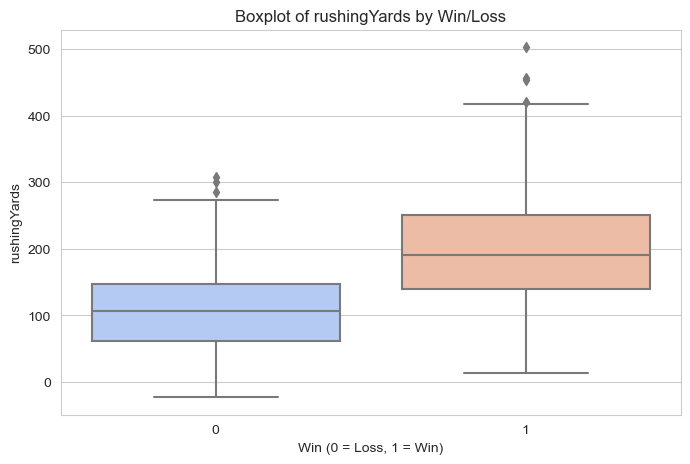

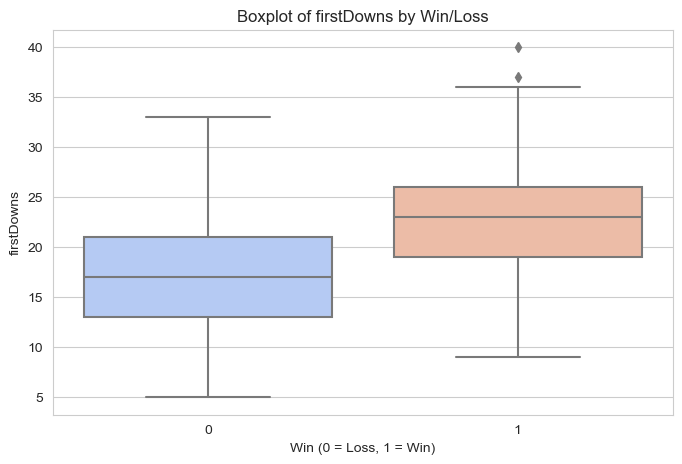

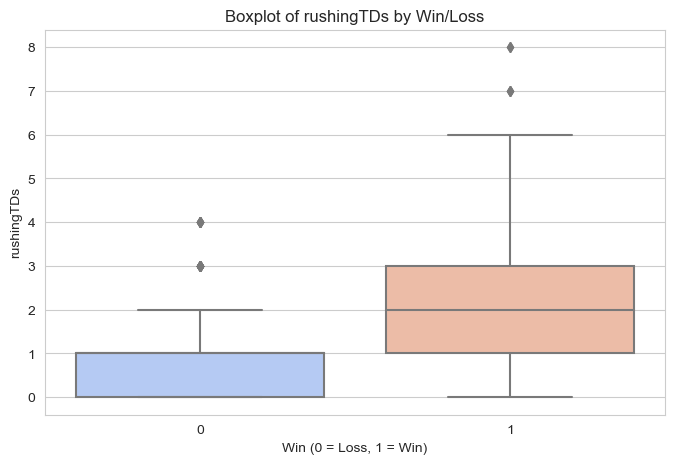

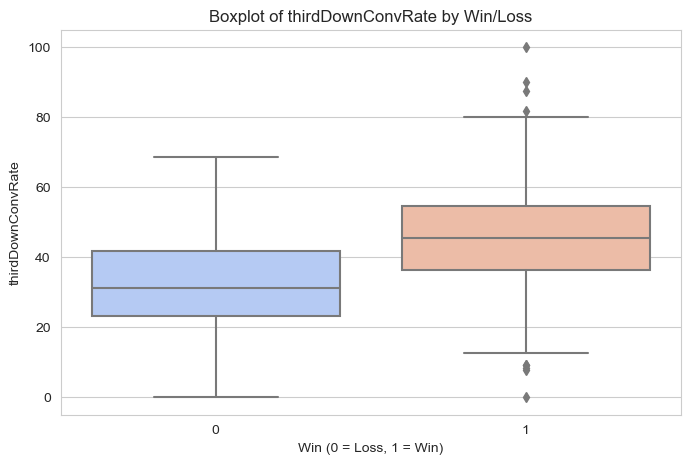

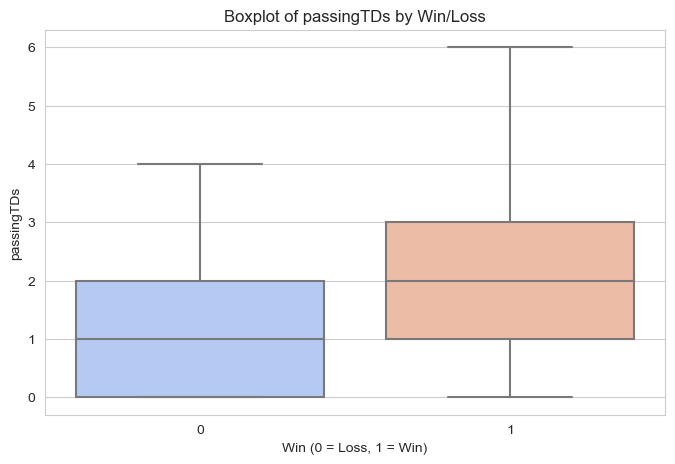

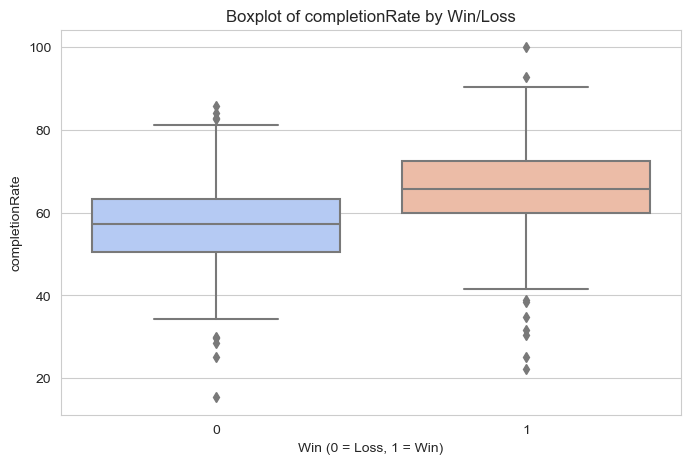

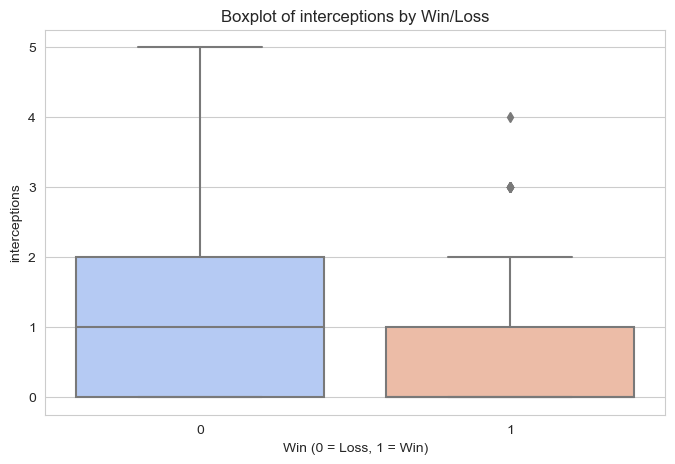

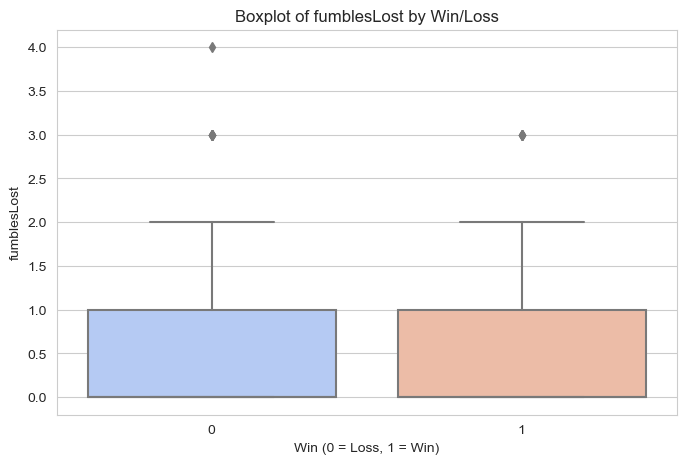

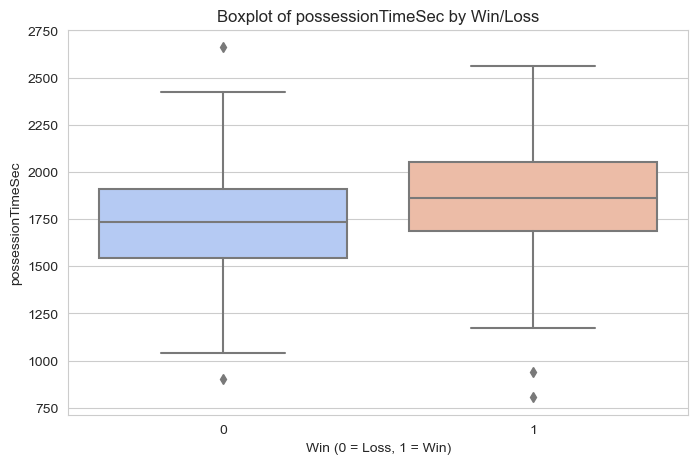

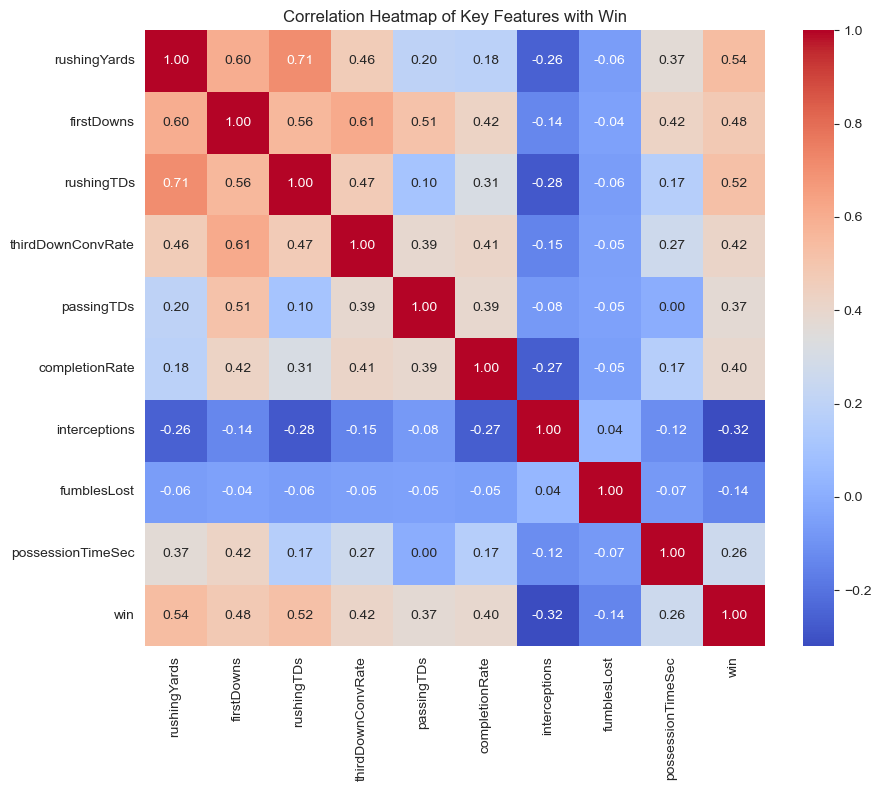

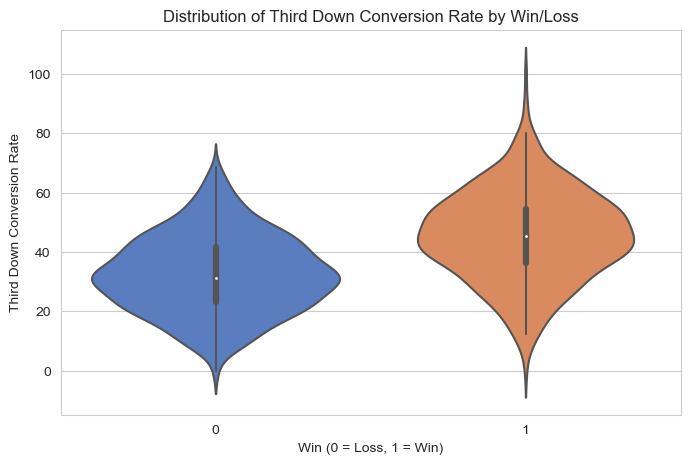

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Features to visualize
top_features = [
    "rushingYards",
    "firstDowns",
    "rushingTDs",
    "thirdDownConvRate",
    "passingTDs",
    "completionRate",
    "interceptions",
    "fumblesLost",
    "possessionTimeSec",
]

# Boxplots for key features split by win/loss
for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_final["win"], y=df_final[feature], palette="coolwarm")
    plt.title(f"Boxplot of {feature} by Win/Loss")
    plt.xlabel("Win (0 = Loss, 1 = Win)")
    plt.ylabel(feature)
    plt.show()

# Correlation Heatmap for numerical features vs. win
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_final[top_features + ["win"]].corr(), annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap of Key Features with Win")
plt.show()

# Violin plot for thirdDownConvRate vs. win (shows distribution shape)
plt.figure(figsize=(8, 5))
sns.violinplot(x=df_final["win"], y=df_final["thirdDownConvRate"], palette="muted")
plt.title("Distribution of Third Down Conversion Rate by Win/Loss")
plt.xlabel("Win (0 = Loss, 1 = Win)")
plt.ylabel("Third Down Conversion Rate")
plt.show()

In [ ]:
## feature engineering --- potential add more featers like yards per play. turnover margin

In [101]:
# Define new feature set without passingTDs and rushingTDs
top_features = [
    "rushingYards",
    "firstDowns",
    "thirdDownConvRate",
    "completionRate",
    "interceptions",
    "fumblesLost",
    "possessionTimeSec",
]

# Select numeric features
X = df_final[top_features]
y = df_final["win"]

# basic LogReg Model

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7417582417582418
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        83
           1       0.78      0.73      0.75        99

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



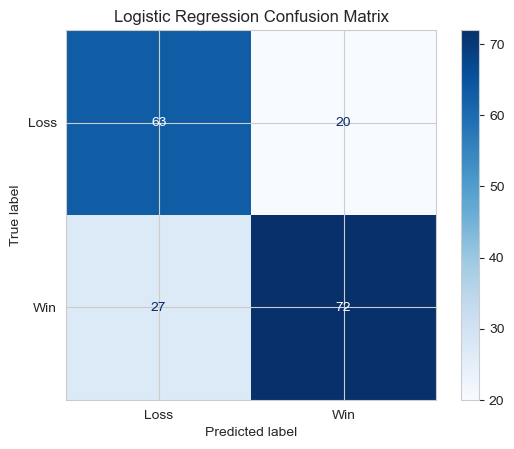

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Loss", "Win"])
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

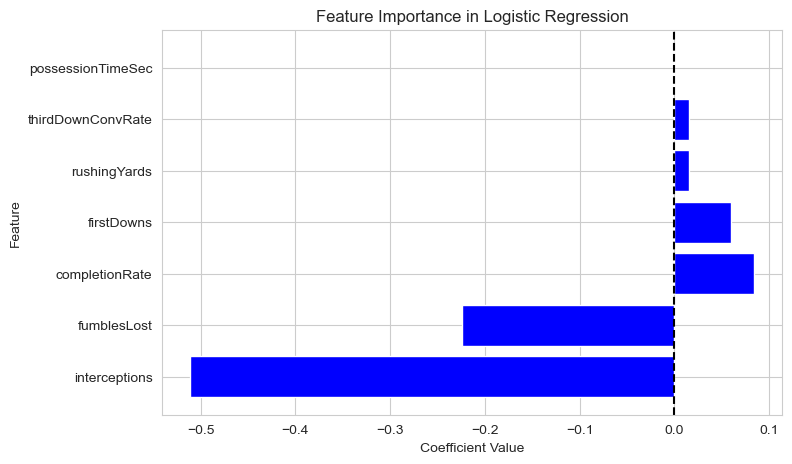

In [114]:
import numpy as np

# Extract feature importance (coefficients)
coefs = log_model.coef_[0]
features = X.columns

# Sort by absolute impact
sorted_indices = np.argsort(np.abs(coefs))[::-1]

plt.figure(figsize=(8, 5))
plt.barh(np.array(features)[sorted_indices], coefs[sorted_indices], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.axvline(0, color="black", linestyle="dashed")
plt.show()

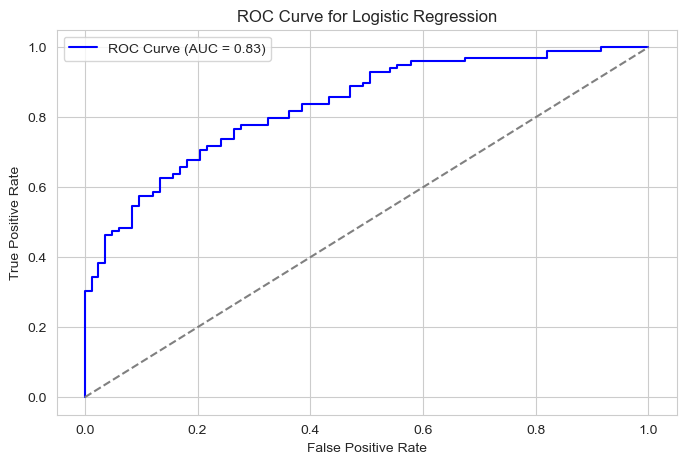

In [115]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class (win)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="dashed")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(
    "\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

Random Forest Accuracy: 0.7692307692307693

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        83
           1       0.79      0.78      0.79        99

    accuracy                           0.77       182
   macro avg       0.77      0.77      0.77       182
weighted avg       0.77      0.77      0.77       182



In [112]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7692307692307693

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76        83
           1       0.81      0.76      0.78        99

    accuracy                           0.77       182
   macro avg       0.77      0.77      0.77       182
weighted avg       0.77      0.77      0.77       182



## Box Score Data Example

In [16]:
# Convert games_data to a DataFrame
games_df = pd.DataFrame(games_data)

# Display the first few rows
print("\nGames Data:")
display(games_df.head())

# Show column names
print("\nColumns in Games Data:")
print(games_df.columns.tolist())


Games Data:


,id,season,week,seasonType,startDate,startTimeTBD,completed,neutralSite,conferenceGame,attendance,...,awayClassification,awayConference,awayPoints,awayLineScores,awayPostgameWinProbability,awayPregameElo,awayPostgameElo,excitementIndex,highlights,notes
0,401525434,2023,1,regular,2023-08-26T18:30:00.000Z,False,True,True,False,49000.0,...,fbs,American Athletic,3,"[0, 0, 0, 3]",0.001042,1471.0,1385.0,1.346908,,None
1,401520145,2023,1,regular,2023-08-26T21:30:00.000Z,False,True,False,True,17982.0,...,fbs,Conference USA,14,"[0, 7, 0, 7]",0.591999,1369.0,1370.0,6.821333,,None
2,401525450,2023,1,regular,2023-08-26T23:00:00.000Z,False,True,False,False,15356.0,...,fbs,FBS Independents,41,"[7, 3, 3, 28]",0.760751,1074.0,1122.0,5.311493,,None
3,401532392,2023,1,regular,2023-08-26T23:00:00.000Z,False,True,False,False,23867.0,...,fbs,Mid-American,13,"[3, 3, 0, 7]",0.045531,1482.0,1473.0,6.547378,,None
4,401520147,2023,1,regular,2023-08-26T23:30:00.000Z,False,True,False,False,21407.0,...,fbs,Mountain West,28,"[7, 7, 0, 14]",0.819154,1246.0,1241.0,5.282033,,None



Columns in Games Data:
['id', 'season', 'week', 'seasonType', 'startDate', 'startTimeTBD', 'completed', 'neutralSite', 'conferenceGame', 'attendance', 'venueId', 'venue', 'homeId', 'homeTeam', 'homeClassification', 'homeConference', 'homePoints', 'homeLineScores', 'homePostgameWinProbability', 'homePregameElo', 'homePostgameElo', 'awayId', 'awayTeam', 'awayClassification', 'awayConference', 'awayPoints', 'awayLineScores', 'awayPostgameWinProbability', 'awayPregameElo', 'awayPostgameElo', 'excitementIndex', 'highlights', 'notes']


In [18]:
games = get_games(year=2024, session_type="regular", classification="fbs")
df_games = pd.DataFrame(games)

# Extract winner & loser
df_games["home_win"] = df_games.apply(
    lambda row: 1 if row["homePoints"] > row["awayPoints"] else 0, axis=1
)

display(df_games.head())

,id,season,week,seasonType,startDate,startTimeTBD,completed,neutralSite,conferenceGame,attendance,...,awayConference,awayPoints,awayLineScores,awayPostgameWinProbability,awayPregameElo,awayPostgameElo,excitementIndex,highlights,notes,home_win
0,401635525,2024,1,regular,2024-08-24T16:00:00.000Z,False,True,True,True,None,...,ACC,21.0,"[8, 6, 0, 7]",0.008604,1692.0,1676.0,7.822224,,Aer Lingus College Football Classic,1
1,401643697,2024,1,regular,2024-08-24T20:00:00.000Z,False,True,False,False,None,...,Big Sky,35.0,"[0, 14, 0, 21]",0.698899,NaN,NaN,4.927318,,None,0
2,401643696,2024,1,regular,2024-08-25T00:00:00.000Z,False,True,False,False,None,...,ACC,29.0,"[0, 10, 3, 16]",0.897291,1690.0,1669.0,7.671492,,None,0
3,401643858,2024,1,regular,2024-08-25T03:59:00.000Z,False,True,False,False,None,...,MEAC,14.0,"[0, 7, 7, 0]",0.043531,NaN,NaN,5.224356,,None,1
4,401628458,2024,1,regular,2024-08-29T22:00:00.000Z,False,True,False,False,None,...,MEAC,7.0,"[0, 7, 0, 0]",0.003017,NaN,NaN,4.681952,,None,1


In [19]:
team_stats = []
for week in range(1, 14):  # Adjust based on season length
    week_data = get_games_team_box(year=2024, week=week)
    team_stats.extend(week_data)

df_team_stats = pd.DataFrame(team_stats)
display(df_team_stats.head())

,id,teams
0,401655657,"[{'teamId': 2086, 'team': 'Butler', 'conferenc..."
1,401655628,"[{'teamId': 2464, 'team': 'Northern Arizona', ..."
2,401628456,"[{'teamId': 2483, 'team': 'Oregon', 'conferenc..."
3,401677179,"[{'teamId': 84, 'team': 'Indiana', 'conference..."
4,401677189,"[{'teamId': 213, 'team': 'Penn State', 'confer..."


## Get team box scores example

In [4]:
team_stats = get_games_team_box(year=2023, team="Alabama")
print("\nTeam Box Scores:")
pd.DataFrame(team_stats).head()


Team Box Scores:


,id,teams
0,401520386,"[{'teamId': 96, 'team': 'Kentucky', 'conferenc..."
1,401520427,"[{'teamId': 2, 'team': 'Auburn', 'conference':..."
2,401520244,"[{'teamId': 333, 'team': 'Alabama', 'conferenc..."
3,401520333,"[{'teamId': 333, 'team': 'Alabama', 'conferenc..."
4,401520183,"[{'teamId': 251, 'team': 'Texas', 'conference'..."


In [45]:
team_stats = []
for week in range(1, 14):  # Adjust based on season length
    week_data = get_games_team_box(year=2024, week=week)
    team_stats.extend(week_data)

df_team_stats = pd.DataFrame(team_stats)
display(df_team_stats.head())

,id,teams
0,401655657,"[{'teamId': 2086, 'team': 'Butler', 'conferenc..."
1,401655628,"[{'teamId': 2464, 'team': 'Northern Arizona', ..."
2,401628456,"[{'teamId': 2483, 'team': 'Oregon', 'conferenc..."
3,401677179,"[{'teamId': 84, 'team': 'Indiana', 'conference..."
4,401677189,"[{'teamId': 213, 'team': 'Penn State', 'confer..."


## Get player stats example


In [40]:
player_stats = get_player_stats(year=2023, team="Georgia", season_type="regular")
print("\nPlayer Stats:")
pd.DataFrame(player_stats).head()


Player Stats:


,id,teams
0,401520225,"[{'team': 'Georgia', 'conference': 'SEC', 'hom..."
1,401520430,"[{'team': 'Georgia Tech', 'conference': 'ACC',..."
2,401520327,"[{'team': 'Vanderbilt', 'conference': 'SEC', '..."
3,401520154,"[{'team': 'Georgia', 'conference': 'SEC', 'hom..."
4,401520191,"[{'team': 'Georgia', 'conference': 'SEC', 'hom..."


In [43]:
import pandas as pd

# Assuming player_stats is already loaded into a DataFrame
df = pd.DataFrame(player_stats)

# Check the structure of the 'teams' column
print("\nSample 'teams' Column Data:")
print(df["teams"].head())  # Print first few entries to inspect the structure

# If needed, expand a single entry in detail
print("\nDetailed structure of the first 'teams' entry:")
if isinstance(df["teams"].iloc[0], list):
    for i, team in enumerate(df["teams"].iloc[0]):
        print(f"Team {i+1}: {team}")

# If teams contain nested dictionaries/lists, this helps us see what needs to be flattened.


Sample 'teams' Column Data:
0    [{'team': 'Georgia', 'conference': 'SEC', 'hom...
1    [{'team': 'Georgia Tech', 'conference': 'ACC',...
2    [{'team': 'Vanderbilt', 'conference': 'SEC', '...
3    [{'team': 'Georgia', 'conference': 'SEC', 'hom...
4    [{'team': 'Georgia', 'conference': 'SEC', 'hom...
Name: teams, dtype: object

Detailed structure of the first 'teams' entry:
Team 1: {'team': 'Georgia', 'conference': 'SEC', 'homeAway': 'home', 'points': 24, 'categories': [{'name': 'punting', 'types': [{'name': 'LONG', 'athletes': [{'id': '4799994', 'name': 'Brett Thorson', 'stat': '44'}]}, {'name': 'In 20', 'athletes': [{'id': '4799994', 'name': 'Brett Thorson', 'stat': '3'}]}, {'name': 'TB', 'athletes': [{'id': '4799994', 'name': 'Brett Thorson', 'stat': '0'}]}, {'name': 'AVG', 'athletes': [{'id': '4799994', 'name': 'Brett Thorson', 'stat': '37.0'}]}, {'name': 'YDS', 'athletes': [{'id': '4799994', 'name': 'Brett Thorson', 'stat': '111'}]}, {'name': 'NO', 'athletes': [{'id': '4799994',

In [46]:
import pandas as pd

# Assuming player_stats is already in a DataFrame
df = pd.DataFrame(player_stats)

# Expand the 'teams' column into separate rows
expanded_data = []
for game in df.itertuples():
    game_id = game.id  # Game ID

    for team in game.teams:
        team_entry = {
            "game_id": game_id,
            "team": team["team"],
            "conference": team.get("conference", None),
            "homeAway": team["homeAway"],
            "points": team["points"],
        }

        # Extract player stats from 'categories'
        for category in team.get(
            "categories", []
        ):  # Iterate through categories (e.g., punting, kicking)
            category_name = category["name"]

            for stat_type in category.get(
                "types", []
            ):  # Iterate through specific stat types
                stat_name = stat_type["name"]

                for athlete in stat_type.get(
                    "athletes", []
                ):  # Iterate through athlete-specific stats
                    athlete_entry = team_entry.copy()
                    athlete_entry["player_id"] = athlete["id"]
                    athlete_entry["player_name"] = athlete["name"]
                    athlete_entry[f"{category_name}_{stat_name}"] = athlete["stat"]

                    expanded_data.append(athlete_entry)

# Convert to final DataFrame
df_final = pd.DataFrame(expanded_data)

# Display all column names
print("\nFully Expanded Player Stats Columns (2023):")
print(df_final.columns.tolist())

# Expand Pandas display settings to show all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)  # Increases width for better visibility

# Now display the DataFrame
display(df_final.head(30))
display(df_final.shape)


Fully Expanded Player Stats Columns (2023):
['game_id', 'team', 'conference', 'homeAway', 'points', 'player_id', 'player_name', 'punting_LONG', 'punting_In 20', 'punting_TB', 'punting_AVG', 'punting_YDS', 'punting_NO', 'kicking_PTS', 'kicking_XP', 'kicking_LONG', 'kicking_PCT', 'kicking_FG', 'kickReturns_TD', 'kickReturns_LONG', 'kickReturns_AVG', 'kickReturns_YDS', 'kickReturns_NO', 'interceptions_TD', 'interceptions_YDS', 'interceptions_INT', 'defensive_TD', 'defensive_QB HUR', 'defensive_PD', 'defensive_TFL', 'defensive_SACKS', 'defensive_SOLO', 'defensive_TOT', 'receiving_LONG', 'receiving_TD', 'receiving_AVG', 'receiving_YDS', 'receiving_REC', 'rushing_LONG', 'rushing_TD', 'rushing_AVG', 'rushing_YDS', 'rushing_CAR', 'passing_QBR', 'passing_INT', 'passing_TD', 'passing_AVG', 'passing_YDS', 'passing_C/ATT', 'fumbles_REC', 'fumbles_LOST', 'fumbles_FUM', 'puntReturns_TD', 'puntReturns_LONG', 'puntReturns_AVG', 'puntReturns_YDS', 'puntReturns_NO']


,game_id,team,conference,homeAway,points,player_id,player_name,punting_LONG,punting_In 20,punting_TB,punting_AVG,punting_YDS,punting_NO,kicking_PTS,kicking_XP,kicking_LONG,kicking_PCT,kicking_FG,kickReturns_TD,kickReturns_LONG,kickReturns_AVG,kickReturns_YDS,kickReturns_NO,interceptions_TD,interceptions_YDS,interceptions_INT,defensive_TD,defensive_QB HUR,defensive_PD,defensive_TFL,defensive_SACKS,defensive_SOLO,defensive_TOT,receiving_LONG,receiving_TD,receiving_AVG,receiving_YDS,receiving_REC,rushing_LONG,rushing_TD,rushing_AVG,rushing_YDS,rushing_CAR,passing_QBR,passing_INT,passing_TD,passing_AVG,passing_YDS,passing_C/ATT,fumbles_REC,fumbles_LOST,fumbles_FUM,puntReturns_TD,puntReturns_LONG,puntReturns_AVG,puntReturns_YDS,puntReturns_NO
0,401520225,Georgia,SEC,home,24,4799994,Brett Thorson,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401520225,Georgia,SEC,home,24,4799994,Brett Thorson,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,401520225,Georgia,SEC,home,24,4799994,Brett Thorson,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,401520225,Georgia,SEC,home,24,4799994,Brett Thorson,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,401520225,Georgia,SEC,home,24,4799994,Brett Thorson,NaN,NaN,NaN,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,401520225,Georgia,SEC,home,24,4799994,Brett Thorson,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,401520225,Georgia,SEC,home,24,5077226,Peyton Woodring,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,401520225,Georgia,SEC,home,24,5077226,Peyton Woodring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,401520225,Georgia,SEC,home,24,5077226,Peyton Woodring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,401520225,Georgia,SEC,home,24,5077226,Peyton Woodring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(6578, 57)

## Get team records example

In [6]:
team_records = get_team_records(year=2023, conference="SEC")
pd.DataFrame(team_records).head()

,year,teamId,team,classification,conference,division,expectedWins,total,conferenceGames,homeGames,awayGames,neutralSiteGames,regularSeason,postseason
0,2023,2,Auburn,fbs,SEC,West,6.402270,"{'games': 13, 'wins': 6, 'losses': 7, 'ties': 0}","{'games': 8, 'wins': 3, 'losses': 5, 'ties': 0}","{'games': 7, 'wins': 3, 'losses': 4, 'ties': 0}","{'games': 5, 'wins': 3, 'losses': 2, 'ties': 0}","{'games': 1, 'wins': 0, 'losses': 1, 'ties': 0}","{'games': 12, 'wins': 6, 'losses': 6, 'ties': 0}","{'games': 1, 'wins': 0, 'losses': 1, 'ties': 0}"
1,2023,8,Arkansas,fbs,SEC,West,5.498400,"{'games': 12, 'wins': 4, 'losses': 8, 'ties': 0}","{'games': 8, 'wins': 1, 'losses': 7, 'ties': 0}","{'games': 6, 'wins': 2, 'losses': 4, 'ties': 0}","{'games': 4, 'wins': 1, 'losses': 3, 'ties': 0}","{'games': 2, 'wins': 1, 'losses': 1, 'ties': 0}","{'games': 12, 'wins': 4, 'losses': 8, 'ties': 0}","{'games': 0, 'wins': 0, 'losses': 0, 'ties': 0}"
2,2023,57,Florida,fbs,SEC,East,5.946479,"{'games': 12, 'wins': 5, 'losses': 7, 'ties': 0}","{'games': 8, 'wins': 3, 'losses': 5, 'ties': 0}","{'games': 6, 'wins': 4, 'losses': 2, 'ties': 0}","{'games': 5, 'wins': 1, 'losses': 4, 'ties': 0}","{'games': 1, 'wins': 0, 'losses': 1, 'ties': 0}","{'games': 12, 'wins': 5, 'losses': 7, 'ties': 0}","{'games': 0, 'wins': 0, 'losses': 0, 'ties': 0}"
3,2023,61,Georgia,fbs,SEC,East,12.557711,"{'games': 14, 'wins': 13, 'losses': 1, 'ties': 0}","{'games': 9, 'wins': 8, 'losses': 1, 'ties': 0}","{'games': 7, 'wins': 7, 'losses': 0, 'ties': 0}","{'games': 4, 'wins': 4, 'losses': 0, 'ties': 0}","{'games': 3, 'wins': 2, 'losses': 1, 'ties': 0}","{'games': 13, 'wins': 12, 'losses': 1, 'ties': 0}","{'games': 1, 'wins': 1, 'losses': 0, 'ties': 0}"
4,2023,96,Kentucky,fbs,SEC,East,6.852863,"{'games': 13, 'wins': 7, 'losses': 6, 'ties': 0}","{'games': 8, 'wins': 3, 'losses': 5, 'ties': 0}","{'games': 7, 'wins': 4, 'losses': 3, 'ties': 0}","{'games': 5, 'wins': 3, 'losses': 2, 'ties': 0}","{'games': 1, 'wins': 0, 'losses': 1, 'ties': 0}","{'games': 12, 'wins': 7, 'losses': 5, 'ties': 0}","{'games': 1, 'wins': 0, 'losses': 1, 'ties': 0}"


# Drives

# Plays

# Teams

# Conferences

# Venues

# Coaches

# Players

In [7]:
import players

# Search for a player
caleb_williams = players.search_players(search_term="Caleb Williams", year=2023)
display(caleb_williams)

# Get player usage for 2023 season
qb_usage = players.get_player_usage(year=2023, position="QB")
display(qb_usage)

# Get returning production for a team
usc_returning = players.get_player_returning(year=2024, team="USC")
display(usc_returning)

,id,team,name,firstName,lastName,weight,height,jersey,position,hometown,teamColor,teamColorSecondary
0,4428884,Lamar,Caleb Williams,Caleb,Williams,300,71,99,DL,Houston,#null,#ebebeb
1,4431611,USC,Caleb Williams,Caleb,Williams,215,73,13,QB,Washington,#9e2237,#ffcc00
2,4837256,Furman,Caleb Williams,Caleb,Williams,185,70,25,S,Tampa,#582c83,#ffffff
3,5081725,Tennessee,Caleb Williams,Caleb,Williams,226,73,59,LB,Franklin,#ff8200,#58595b
4,5154304,Pittsburgh,Caleb Williams,Caleb,Williams,205,71,30,RB,Pittsburgh,#003263,#231f20


,season,id,name,position,team,conference,usage
0,2023,4688380,Cameron Ward,QB,Washington State,Pac-12,"{'overall': '0.7509', 'pass': '1.0057', 'rush'..."
1,2023,4709977,Brayden Schager,QB,Hawai'i,Mountain West,"{'overall': '0.7379', 'pass': '0.9982', 'rush'..."
2,2023,4682518,Nick Vattiato,QB,Middle Tennessee,Conference USA,"{'overall': '0.7090', 'pass': '1.0310', 'rush'..."
3,2023,4690977,Donovan Smith,QB,Houston,Big 12,"{'overall': '0.7017', 'pass': '1.0047', 'rush'..."
4,2023,4432762,Shedeur Sanders,QB,Colorado,Pac-12,"{'overall': '0.6818', 'pass': '0.9535', 'rush'..."
...,...,...,...,...,...,...,...
410,2023,4685691,Brady Allen,QB,Louisville,ACC,"{'overall': '0.0011', 'pass': '0.0023', 'rush'..."
411,2023,4430950,Jefferson Boaz,QB,North Carolina,ACC,"{'overall': '0.0011', 'pass': '0.0021', 'rush'..."
412,2023,4432444,Jackson Muschamp,QB,Georgia,SEC,"{'overall': '0.0010', 'pass': '0.0000', 'rush'..."
413,2023,4431535,Jake Rubley,QB,Kansas State,Big 12,"{'overall': '0.0010', 'pass': '0.0023', 'rush'..."


,season,team,conference,totalPPA,totalPassingPPA,totalReceivingPPA,totalRushingPPA,percentPPA,percentPassingPPA,percentReceivingPPA,percentRushingPPA,usage,passingUsage,receivingUsage,rushingUsage
0,2024,USC,Pac-12,152.5,41.5,91.1,19.9,0.223,0.19,0.264,0.163,0.196,0.146,0.349,0.105


# Rankings

# Betting

# Recruiting

In [ ]:
import recruiting

# Get recruiting player rankings for 2024
players_2024 = recruiting.get_recruiting_players(year=2024)
display(players_2024)

# Get team recruiting rankings for 2024
teams_2024 = recruiting.get_recruiting_teams(year=2024)
display(teams_2024)

""


# Ratings

In [8]:
import ratings

# Get SP+ ratings for 2024
sp_ratings_2024 = ratings.get_sp_ratings(year=2024, team=None)
display(sp_ratings_2024)

# Get conference SP+ ratings for 2024
conf_ratings_2024 = ratings.get_sp_conference_ratings(year=2024)
display(conf_ratings_2024)

# Get FPI ratings for USC in 2024
usc_fpi = ratings.get_fpi_ratings(year=2024, team="USC")
display(usc_fpi)

# Get Elo ratings for Week 1 of 2024
week1_elo = ratings.get_elo_ratings(year=2024, week=1)
display(week1_elo)

,year,team,conference,rating,ranking,secondOrderWins,sos,offense,defense,specialTeams
0,2024,Ohio State,Big Ten,31.200000,1,None,None,"{'ranking': '3', 'rating': 39.5, 'success': No...","{'ranking': '134', 'rating': 9.2, 'success': N...",{'rating': 0.8}
1,2024,Ole Miss,SEC,27.900000,2,None,None,"{'ranking': '7', 'rating': 37.7, 'success': No...","{'ranking': '132', 'rating': 11.9, 'success': ...",{'rating': 2.1}
2,2024,Oregon,Big Ten,26.000000,3,None,None,"{'ranking': '2', 'rating': 40.8, 'success': No...","{'ranking': '121', 'rating': 16.3, 'success': ...",{'rating': 1.5}
3,2024,Alabama,SEC,25.000000,4,None,None,"{'ranking': '6', 'rating': 37.9, 'success': No...","{'ranking': '127', 'rating': 14.6, 'success': ...",{'rating': 1.7}
4,2024,Penn State,Big Ten,24.600000,5,None,None,"{'ranking': '9', 'rating': 37.5, 'success': No...","{'ranking': '131', 'rating': 13.1, 'success': ...",{'rating': 0.2}
...,...,...,...,...,...,...,...,...,...,...
130,2024,Middle Tennessee,Conference USA,-24.400000,131,None,None,"{'ranking': '131', 'rating': 13.7, 'success': ...","{'ranking': '13', 'rating': 37.3, 'success': N...",{'rating': -0.8}
131,2024,Kennesaw State,Conference USA,-25.100000,132,None,None,"{'ranking': '134', 'rating': 10.2, 'success': ...","{'ranking': '17', 'rating': 35.1, 'success': N...",{'rating': -0.3}
132,2024,Southern Miss,Sun Belt,-25.600000,133,None,None,"{'ranking': '130', 'rating': 14.4, 'success': ...","{'ranking': '7', 'rating': 39.4, 'success': No...",{'rating': -0.6}
133,2024,Kent State,Mid-American,-33.000000,134,None,None,"{'ranking': '133', 'rating': 12.6, 'success': ...","{'ranking': '1', 'rating': 43.8, 'success': No...",{'rating': -1.9}


,year,conference,rating,secondOrderWins,sos,offense,defense,specialTeams
0,2024,ACC,5.0470588235294118,None,None,"{'rating': '30.6176470588235294', 'success': N...","{'rating': '25.7000000000000000', 'success': N...",{'rating': '0.15294117647058823529'}
1,2024,American Athletic,-4.9428571428571429,None,None,"{'rating': '27.2071428571428571', 'success': N...","{'rating': '32.0857142857142857', 'success': N...",{'rating': '-0.06428571428571428571'}
2,2024,Big 12,5.2812500000000000,None,None,"{'rating': '29.7312500000000000', 'success': N...","{'rating': '24.5625000000000000', 'success': N...",{'rating': '0.11250000000000000000'}
3,2024,Big Ten,8.0000000000000000,None,None,"{'rating': '27.5166666666666667', 'success': N...","{'rating': '19.8277777777777778', 'success': N...",{'rating': '0.30000000000000000000'}
4,2024,Conference USA,-12.4800000000000000,None,None,"{'rating': '18.9900000000000000', 'success': N...","{'rating': '30.7100000000000000', 'success': N...",{'rating': '-0.76000000000000000000'}
5,2024,FBS Independents,1.16666666666666666667,None,None,"{'rating': '28.6666666666666667', 'success': N...","{'rating': '26.7000000000000000', 'success': N...",{'rating': '-0.80000000000000000000'}
6,2024,Mid-American,-9.8500000000000000,None,None,"{'rating': '21.5333333333333333', 'success': N...","{'rating': '31.3500000000000000', 'success': N...",{'rating': '-0.02500000000000000000'}
7,2024,Mountain West,-7.3000000000000000,None,None,"{'rating': '24.5666666666666667', 'success': N...","{'rating': '30.9250000000000000', 'success': N...",{'rating': '-0.95000000000000000000'}
8,2024,Pac-12,-2.7000000000000000,None,None,"{'rating': '30.0500000000000000', 'success': N...","{'rating': '31.9000000000000000', 'success': N...",{'rating': '-0.75000000000000000000'}
9,2024,SEC,14.8250000000000000,None,None,"{'rating': '32.1812500000000000', 'success': N...","{'rating': '18.4687500000000000', 'success': N...",{'rating': '1.1000000000000000'}


,year,team,conference,fpi,resumeRanks,efficiencies
0,2024,USC,Big Ten,13.269,"{'strengthOfRecord': 45, 'fpi': 18, 'averageWi...","{'overall': 71.782, 'offense': 72.12, 'defense..."


,year,team,conference,elo
0,2024,Air Force,Mountain West,1572
1,2024,Akron,Mid-American,1161
2,2024,Alabama,SEC,1997
3,2024,App State,Sun Belt,1578
4,2024,Arizona,Big 12,1720
...,...,...,...,...
128,2024,Western Kentucky,Conference USA,1323
129,2024,Western Michigan,Mid-American,1309
130,2024,West Virginia,Big 12,1546
131,2024,Wisconsin,Big Ten,1593


# Metrics

# Stats

# Draft

In [1]:
import draft
import pandas as pd

# Get 2024 Draft Data
picks_2024 = draft.get_draft_picks(year=2024)
picks_2024.head(2)åç

,collegeAthleteId,nflAthleteId,collegeId,collegeTeam,collegeConference,nflTeamId,nflTeam,year,overall,round,pick,name,position,height,weight,preDraftRanking,preDraftPositionRanking,preDraftGrade,hometownInfo
0,4431611.0,108247,30,USC,Pac-12,3,Chicago,2024,1,1,1,Caleb Williams,Quarterback,73.0,214.0,1.0,1.0,97.0,"{'city': 'Washington', 'state': 'DC', 'country..."
1,4426348.0,107317,99,LSU,SEC,28,Washington,2024,2,1,2,Jayden Daniels,Quarterback,76.0,210.0,5.0,2.0,94.0,"{'city': 'San Bernardino', 'state': 'CA', 'cou..."


In [2]:
# Get all available draft positions
positions = draft.get_draft_positions()
positions.head()

,name,abbreviation
0,Center,C
1,Cornerback,CB
2,Defensive Back,DB
3,Defensive Edge,EDGE
4,Defensive End,DE


In [5]:
# Get draft picks for a specific school
alabama_picks = draft.get_draft_picks(school="Alabama", year=2024)
alabama_picks

,collegeAthleteId,nflAthleteId,collegeId,collegeTeam,collegeConference,nflTeamId,nflTeam,year,overall,round,pick,name,position,height,weight,preDraftRanking,preDraftPositionRanking,preDraftGrade,hometownInfo
0,4431437,108261,333,Alabama,SEC,10,Tennessee,2024,7,1,7,JC Latham,Offensive Tackle,78,342,23,5,90,"{'city': 'Oak Creek', 'state': 'WI', 'country'..."
1,4565190,108253,333,Alabama,SEC,16,Minnesota,2024,17,1,17,Dallas Turner,Defensive Edge,75,247,7,1,93,"{'city': 'Fort Lauderdale', 'state': 'FL', 'co..."
2,4592837,108266,333,Alabama,SEC,8,Detroit,2024,24,1,24,Terrion Arnold,Cornerback,72,189,11,2,92,"{'city': 'Tallahassee', 'state': 'FL', 'countr..."
3,4433975,108257,333,Alabama,SEC,18,New Orleans,2024,41,2,9,Kool-Aid McKinstry,Cornerback,72,199,27,5,89,"{'city': 'Birmingham', 'state': 'AL', 'country..."
4,4428989,108286,333,Alabama,SEC,27,Tampa Bay,2024,57,2,25,Chris Braswell,Defensive Edge,75,251,57,7,82,"{'city': 'Baltimore', 'state': 'MD', 'country'..."
5,4429033,107134,333,Alabama,SEC,4,Cincinnati,2024,80,3,16,Jermaine Burton,Wide Receiver,72,196,150,24,60,"{'city': 'Calabasas', 'state': 'CA', 'country'..."
6,4567138,107137,333,Alabama,SEC,24,Los Angeles,2024,105,4,5,Justin Eboigbe,Defensive Tackle,76,297,161,15,58,"{'city': 'Forest Park', 'state': 'GA', 'countr..."
7,4429001,108426,333,Alabama,SEC,1,Atlanta,2024,186,6,10,Jase McClellan,Running Back,70,221,279,26,38,"{'city': 'Aledo', 'state': 'TX', 'country': 'U..."
8,4567104,107111,333,Alabama,SEC,16,Minnesota,2024,203,6,27,Will Reichard,Place Kicker,73,187,323,2,33,"{'city': 'Hoover', 'state': 'AL', 'country': '..."
9,4363417,108521,333,Alabama,SEC,20,New York,2024,257,7,37,Jaylen Key,Safety,73,208,292,24,36,"{'city': 'Tallahassee', 'state': 'FL', 'countr..."


# Adjusted Metrics